In [1]:
"""
Name: Lovette Oyewole
    Student ID: 190888960
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## for visualizing
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# for training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE #feature selection
import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix


candy_data = pd.read_csv('/Users/lovetteoyewole/Downloads/candy-data.csv')

In [3]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
## lets check shape of the dataframe
candy_data.shape

(85, 13)

In [5]:
## lets check some info about candy data 
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


there is no null data in the dataset
*our task is to predict whether a candy has chocolate in it or not*

In [60]:
# get more info on the dataset
candy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


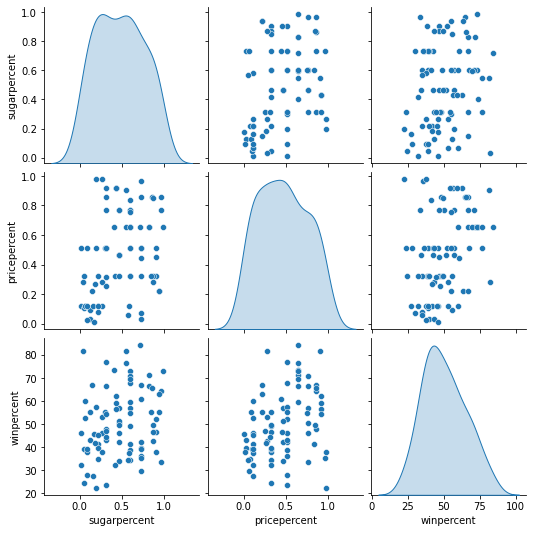

In [58]:
#divide the dataset into categorical and continuous for further analysis

cat_data = candy_data[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']]
cont_data = candy_data[['sugarpercent','pricepercent','winpercent']]

#check distribution on the cont features

sns.pairplot(data= cont_data, diag_kind='kde')

Looking at the results, one can say the sugarpercent,pricepercent and winpercent are fairly normally distributed

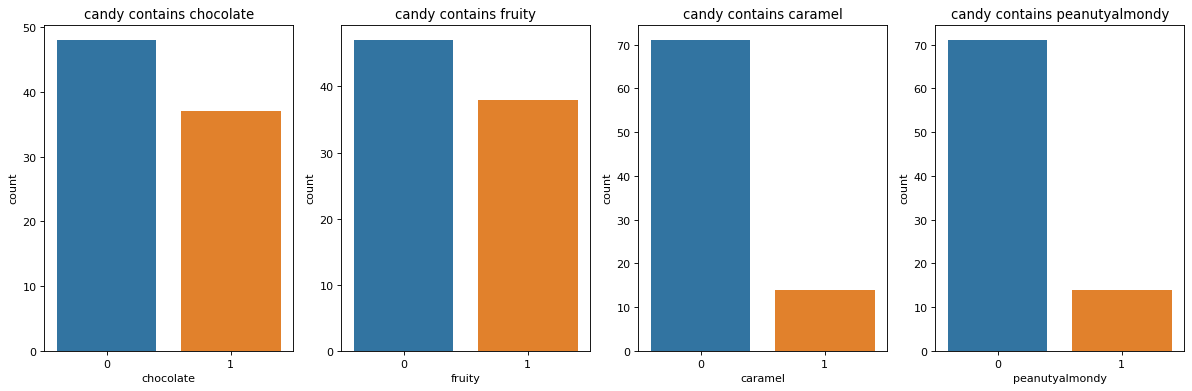

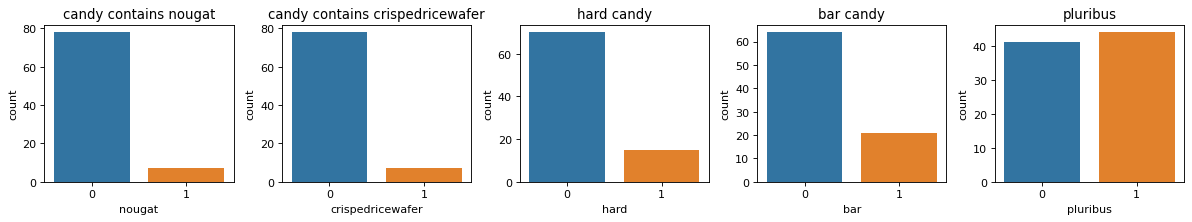

In [59]:
# check distribution on categorical features

plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,4,1)
sns.countplot(x=candy_data['chocolate'])
plt.title("candy contains chocolate")

plt.subplot(1,4,2)
sns.countplot(x=candy_data['fruity'])

plt.title("candy contains fruity")

plt.subplot(1,4,3)
sns.countplot(x=candy_data['caramel'])
plt.title("candy contains caramel")


plt.subplot(1,4,4)
sns.countplot(x=candy_data['peanutyalmondy'])
plt.title("candy contains peanutyalmondy")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5), dpi=80)
plt.subplot(2,5,1)
sns.countplot(x=candy_data['nougat'])
plt.title("candy contains nougat")

plt.subplot(2,5,2)
sns.countplot(x=candy_data['crispedricewafer'])

plt.title("candy contains crispedricewafer")

plt.subplot(2,5,3)
sns.countplot(x=candy_data['hard'])
plt.title("hard candy")

plt.subplot(2,5,4)
sns.countplot(x=candy_data['bar'])
plt.title("bar candy")

plt.subplot(2,5,5)
sns.countplot(x=candy_data['pluribus'])
plt.title("pluribus")
plt.tight_layout()
plt.show()

In [9]:
## creating a feature that tells us one certain candy what type of features contains
candy_data['features'] = candy_data['chocolate']+candy_data['fruity']+candy_data['caramel']+candy_data['peanutyalmondy']+candy_data['nougat']+candy_data['crispedricewafer']

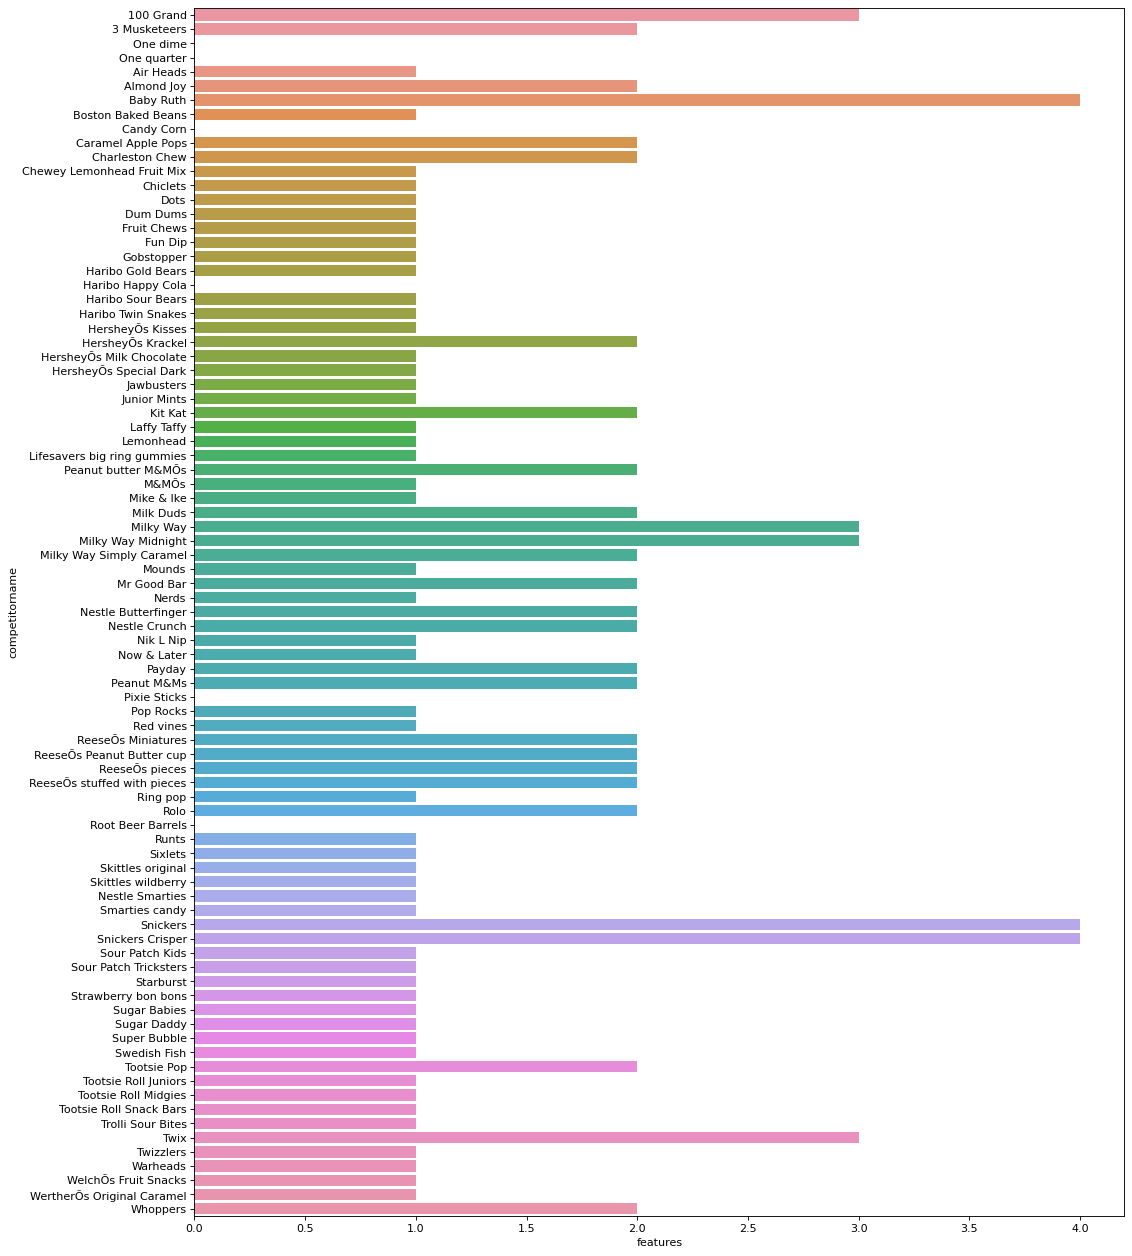

In [10]:
plt.figure(figsize=(15,20), dpi=80)

sns.barplot(x="features",y="competitorname",data=candy_data)
plt.show()

some candies like snickers,snickes crisper and baby ruth has lots of features and flavors

# Let's Answer some Questions Regarding Ranking Among Candies

* top voted candies

In [11]:
top_candies_win = candy_data.sort_values(by='winpercent',ascending=False)
top_candies_win.head(10)
## top 10 voted candies

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,features
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,2
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,2
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,3
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,2
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,4
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,2
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,3
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,2
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,2
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,2


all top voted ten candies has chocolate as their ingredient

In [12]:
## let's look at least voted candies
top_candies_win.tail(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,features
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958,0
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995,1
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,0
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439,1
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865,1
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988,1
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,1
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341,1


* top sugary candies

In [13]:
top_candies_sugary= candy_data.sort_values(by='sugarpercent',ascending=False)
top_candies_sugary.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,features
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,2
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550,1
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340,2
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,1
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,1
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,0
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716,1
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,2


sugary candies are not much popular as per votes

* top costly candies

In [14]:
top_candies_costly = candy_data.sort_values(by='pricepercent',ascending = False)
top_candies_costly.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,features
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188,1
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341,1
55,Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.290756,1
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481,2
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451,2
25,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0,0.430,0.918,59.236122,1
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.490501,1
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,3
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3
56,Rolo,1,0,1,0,0,0,0,0,1,0.860,0.860,65.716286,2


costly candies are not much popular as per votes and maximum costly canides contain chocolates

# Let's Create A Logistic Regression Model To Predict Whether A Candy Contains Chocolate Or Not

### Training of the Logistic Regression Model
Since we only have one dataset we are going to use the sklearn train_test_split feature to split the data into train and test datasets and use them for training and testing of the model.

In [15]:
## divided the data set into train and test
df_train,df_test = train_test_split(candy_data,train_size=0.7,test_size=0.3,random_state=80)


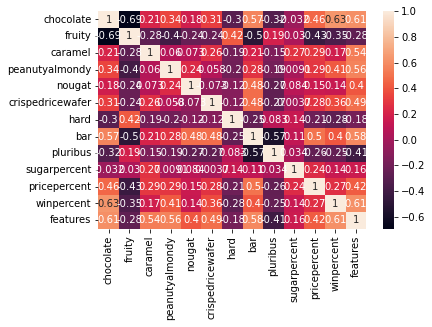

In [16]:
## checking heat map of variables
candy_data_corr = df_train[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent','features']]
sns.heatmap(candy_data_corr.corr(),annot=True)
plt.show()

The correlation between features look fine.

In [17]:
## lets scale some variables for use in our predictive model
# From the sklearn library, we need to use MinMaxScaler to implement Normalization on the winpercent and features col
# because they are the only ones with varying scales (win percent is a percentage and features is the number of feature
# each candy has, and the algorithm you are using does not make assumptions about the distribution of your data
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = ['winpercent','features']
candy_data_corr[scale_var] = scaler.fit_transform(candy_data_corr[scale_var])

In [18]:
## lets check the head once 
candy_data_corr.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,features
72,0,1,0,0,0,0,0,0,0,0.162,0.116,0.078700,0.25
65,1,0,1,1,0,1,0,1,0,0.604,0.651,0.600696,1.00
29,0,1,0,0,0,0,0,0,0,0.220,0.116,0.306864,0.25
19,0,0,0,0,0,0,0,0,1,0.465,0.465,0.189740,0.00
22,1,0,0,0,0,0,0,0,1,0.127,0.093,0.533411,0.25


We are going to predict caramel or not using other features so we put the other features in X training set and caramel in y training set i.e. since it is Supervised Learning we make X: known inputs and y: known outputs.



In [19]:
y_train = candy_data_corr.pop('caramel')
X_train = candy_data_corr

In [20]:
logReg = LogisticRegression()

In [21]:
rfe = RFE(logReg,7)
rfe = rfe.fit(X_train,y_train)
cols = X_train.columns[rfe.support_]
cols
## features selected by rfe 

Index(['fruity', 'peanutyalmondy', 'crispedricewafer', 'hard', 'sugarpercent',
       'pricepercent', 'features'],
      dtype='object')

## lets run one logistic regression model using features selected by rfe
The glm() function fits generalized linear models, a class of models that includes logistic regression. The syntax of the glm() function is similar to that of lm(), except that we must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

In [22]:
model1 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family=sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       51
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.277
Date:                Thu, 21 Jul 2022   Deviance:                       20.553
Time:                        11:38:10   Pearson chi2:                     26.7
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.4146      2.836     -2.614      0.009     -12.974      -1.855
fruity              -1.6157      1.917     -0.843      0.399      -5.374       2.142
peanutyalmondy      -4.3243      2.116     -2.044      0.041      -8.471      -0.178
crispedricewafer    -2.0517      2.057     -0.997      0.319      -6.084       1.981
hard               -20.1476   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
sugarpercent         4.1278      2.847      1.450      0.147      -1.452       9.707
pricepercent        -0.3137      3.570     -0.088      0.930      -7.311       6.683
features            12.8716      4.398      2.926      0.003       4.251      21.492
====================================================================================
"""

some feature's p value is really high need to drop some feature after checking vif of each

In [23]:
## lets look for variance inflation factor of features 
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['vif'] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,features,vif
6,features,7.58
5,pricepercent,4.41
4,sugarpercent,4.16
0,fruity,2.34
1,peanutyalmondy,2.24
2,crispedricewafer,1.62
3,hard,1.51


let's remove the hard feature and run the model again. As per our model this feature is statistically unfit in the data. It's p value is close to 1 i.e there is no correlation between the features other than due to chance.

In [24]:
X_train_new = X_train[cols]
X_train_new.drop('hard',axis=1,inplace=True)
## dropped hard due to its high p value 

In [25]:
## lets check our new feature set
X_train_new.columns

Index(['fruity', 'peanutyalmondy', 'crispedricewafer', 'sugarpercent',
       'pricepercent', 'features'],
      dtype='object')

In [26]:
model2 = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
model2 = model2.fit()
model2.summary()
## fit our model to new data set after removing one feature

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       52
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.948
Date:                Thu, 21 Jul 2022   Deviance:                       21.897
Time:                        11:38:10   Pearson chi2:                     27.4
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.2649      2.683     -2.708      0.007     -12.523      -2.006
fruity              -2.4283      1.758     -1.382      0.167      -5.873       1.017
peanutyalmondy      -4.2183      2.076     -2.031      0.042      -8.288      -0.148
crispedricewafer    -1.8923      1.995     -0.949      0.343      -5.802       2.017
sugarpercent         4.3404      2.946      1.473      0.141      -1.434      10.114
pricepercent        -0.5521      3.398     -0.162      0.871      -7.213       6.108
features            12.4910      4.159      3.003      0.003       4.339      20.643
====================================================================================
"""

In [27]:
## lets look for variance inflation factor of features 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,features,vif
5,features,7.54
4,pricepercent,4.40
3,sugarpercent,4.02
1,peanutyalmondy,2.24
0,fruity,1.99
2,crispedricewafer,1.62


In [28]:
## remove feature pricepercent
X_train_new.drop('pricepercent',axis=1,inplace=True)
## drop pricepercent cuz to its high p value 

In [29]:
model3 = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
model3 = model3.fit()
model3.summary()
## fit model to our revised dataset

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       53
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.962
Date:                Thu, 21 Jul 2022   Deviance:                       21.923
Time:                        11:38:10   Pearson chi2:                     28.6
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.4832      2.403     -3.114      0.002     -12.193      -2.773
fruity              -2.2604      1.419     -1.593      0.111      -5.041       0.520
peanutyalmondy      -4.2147      2.053     -2.053      0.040      -8.238      -0.192
crispedricewafer    -1.9808      1.925     -1.029      0.303      -5.753       1.792
sugarpercent         4.1614      2.724      1.528      0.127      -1.177       9.500
features            12.4645      4.179      2.982      0.003       4.273      20.656
====================================================================================
"""

In [30]:
## lets look for variance inflation factor of features 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,features,vif
4,features,6.01
3,sugarpercent,3.24
1,peanutyalmondy,2.23
0,fruity,1.93
2,crispedricewafer,1.62


In [31]:
X_train_new.drop('crispedricewafer',axis=1,inplace=True)
## drop crispedricewafer due to its high p value 

In [32]:
model4 = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
model4 = model4.fit()
model4.summary()
## fit our model in revised data set

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       54
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.570
Date:                Thu, 21 Jul 2022   Deviance:                       23.140
Time:                        11:38:10   Pearson chi2:                     31.4
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.3909      2.465     -2.998      0.003     -12.222      -2.560
fruity            -2.0039      1.364     -1.469      0.142      -4.678       0.670
peanutyalmondy    -3.7209      2.059     -1.807      0.071      -7.756       0.315
sugarpercent       4.6661      2.636      1.770      0.077      -0.501       9.833
features          10.4658      3.635      2.880      0.004       3.342      17.589
==================================================================================
"""

In [33]:
## lets look for variance inflation factor of features 
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,features,vif
3,features,4.03
2,sugarpercent,3.11
1,peanutyalmondy,1.95
0,fruity,1.73


In [34]:
X_train_new.drop('fruity',axis=1,inplace=True)
## drop fruity due to its high p value 

In [35]:
model5 = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
model5 = model5.fit()
model5.summary()
## again fit our model to revised data set

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       55
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.814
Date:                Thu, 21 Jul 2022   Deviance:                       25.628
Time:                        11:38:10   Pearson chi2:                     54.0
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.2132      2.425     -3.387      0.001     -12.966      -3.460
peanutyalmondy    -3.5088      2.255     -1.556      0.120      -7.928       0.910
sugarpercent       3.7306      2.352      1.586      0.113      -0.878       8.340
features          12.0140      3.675      3.269      0.001       4.812      19.216
==================================================================================
"""

In [36]:
## lets look for variance inflation factor of features 
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,features,vif
2,features,3.84
1,sugarpercent,2.74
0,peanutyalmondy,1.71


In [37]:
X_train_new.drop('peanutyalmondy',axis=1,inplace=True)
## drop bar due to its high p value that means its not statistically fit in our data

In [38]:
model6 = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
model6 = model6.fit()
model6.summary()
## again fit our model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       56
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.070
Date:                Thu, 21 Jul 2022   Deviance:                       30.139
Time:                        11:38:10   Pearson chi2:                     65.0
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.7377      2.395     -3.231      0.001     -12.431      -3.044
sugarpercent     4.1142      2.279      1.805      0.071      -0.353       8.581
features         8.9832      3.317      2.709      0.007       2.483      15.484
================================================================================
"""

In [39]:
## lets look for variance inflation factor of features 
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,features,vif
0,sugarpercent,2.58
1,features,2.58


In [40]:
X_train_new.drop('sugarpercent',axis=1,inplace=True)
# drop br due to its high p value that means its not statistically fit in our data

In [41]:
model7 = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
model7 = model7.fit()
model7.summary()
# again fit our model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                caramel   No. Observations:                   59
Model:                            GLM   Df Residuals:                       57
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.123
Date:                Thu, 21 Jul 2022   Deviance:                       34.246
Time:                        11:38:10   Pearson chi2:                     58.5
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1922      1.401     -3.705      0.000      -7.939      -2.446
features       8.6059      3.042      2.829      0.005       2.643      14.568
==============================================================================
"""

We will stop tuning the model here as we have reached the desired model with p values equal to or lower than 0.05 which indicates the num of features is strongly connected to whether it has caramel or not. We can regect the null hypothesis which is that no features affects what type of candy it is, since there is only a 5% chance it is true.

## lets test the model

In [42]:
## lets predict whether candies would have caramel or not
y_train_pred = model7.predict(sm.add_constant(X_train_new)).values.reshape(-1)
y_train_pred[:10]

array([0.04561781, 0.96812808, 0.04561781, 0.00552883, 0.04561781,
       0.29125479, 0.04561781, 0.04561781, 0.04561781, 0.04561781])

In [43]:
final_pred = pd.DataFrame({'competitorname':df_train['competitorname'].values,'caramel':y_train.values,'pred':y_train_pred})
final_pred.head()
## created a new dataframe with candies name and their prediction values

,competitorname,caramel,pred
0,Super Bubble,0,0.045618
1,Snickers Crisper,1,0.968128
2,Laffy Taffy,0,0.045618
3,Haribo Happy Cola,0,0.005529
4,HersheyÕs Kisses,0,0.045618


lets find an optimal cutoff to decide basis on which we will decide whether a candy contains a caramelor not


# lets plot the ROC curve 




An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [44]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate ')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [45]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( final_pred.caramel, final_pred.pred, drop_intermediate = False )

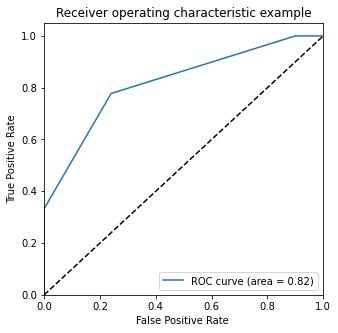

In [46]:
draw_roc(final_pred.caramel, final_pred.pred)

The area under the curve is 0.82 which indicates that the usefulness of the testing is excellent. 

# lets find the optimal cutoff point for predict 

Cut-off represents in a binary classification the probability that the prediction is true. It represents the tradeoff between false positives and false negatives.

In [47]:
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    final_pred[i] = final_pred['pred'].map(lambda x:1 if x>i else 0)
final_pred.head()

,competitorname,caramel,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,Super Bubble,0,0.045618,1,0,0,0,0,0,0,0,0,0
1,Snickers Crisper,1,0.968128,1,1,1,1,1,1,1,1,1,1
2,Laffy Taffy,0,0.045618,1,0,0,0,0,0,0,0,0,0
3,Haribo Happy Cola,0,0.005529,1,0,0,0,0,0,0,0,0,0
4,HersheyÕs Kisses,0,0.045618,1,0,0,0,0,0,0,0,0,0


created a data frame with all the values for different cut offs

In [48]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(final_pred.caramel, final_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi  speci
0.0   0.0  0.152542  1.000000   0.00
0.1   0.1  0.762712  0.777778   0.76
0.2   0.2  0.762712  0.777778   0.76
0.3   0.3  0.898305  0.333333   1.00
0.4   0.4  0.898305  0.333333   1.00
0.5   0.5  0.898305  0.333333   1.00
0.6   0.6  0.898305  0.333333   1.00
0.7   0.7  0.898305  0.333333   1.00
0.8   0.8  0.881356  0.222222   1.00
0.9   0.9  0.881356  0.222222   1.00


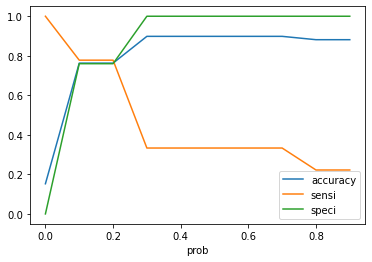

In [49]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

as per accuracy,specificity and sensitivity curve for different optimal cutoff points chose our optimal cutoff point as 0.22

In [50]:
final_pred['result'] = final_pred['pred'].apply(lambda x:1 if x>0.22 else 0)
final_pred.head()

,competitorname,caramel,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,result
0,Super Bubble,0,0.045618,1,0,0,0,0,0,0,0,0,0,0
1,Snickers Crisper,1,0.968128,1,1,1,1,1,1,1,1,1,1,1
2,Laffy Taffy,0,0.045618,1,0,0,0,0,0,0,0,0,0,0
3,Haribo Happy Cola,0,0.005529,1,0,0,0,0,0,0,0,0,0,0
4,HersheyÕs Kisses,0,0.045618,1,0,0,0,0,0,0,0,0,0,0


In [51]:
confusion = confusion_matrix(final_pred.caramel,final_pred.result)
confusion

array([[38, 12],
       [ 2,  7]])

In [52]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7777777777777778

In [54]:
# Let us calculate specificity
TN / float(TN+FP)

0.76

In [55]:
# Calculate false postive rate - predicting caramel when customer does not have caramel
print(FP/ float(TN+FP))

0.24


In [56]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3684210526315789


In [57]:
# Negative predictive value
print (TN / float(TN+ FN))

0.95


in our training data, we have achieved an accuracy of 89% with a positive predictive value of 80% and a negative predictive value of 96%

The more specific the test, the less likely the candy with caramel will have other features and the greater the positive predictive value. When the prevalence of preclinical disease is low, the positive predictive value will also be low, even using a test with high sensitivity and specificity.